![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do intervalo ficar menor do que  xtol,
    ou quando o valor absoluto da função ficar abaixo de  ytol.
    """
    pontos = [a, b]
    while True:
        z = (a + b)/2
        pontos.append(z)
        
        if abs(b - a) < xtol or abs(f(z)) < ytol:
            return pontos
        
        if f(a)*f(z) < 0:
            b = z
        else:
            a = z


In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do passo é menor do que  xtol,
    quando o valor absoluto da função ficar abaixo de  ytol,
    ou após  maxiter  iterações.
    """
    pontos = [x]
    for i in range(maxiter):
        passo = f(x)/df(x)
        xnext = x - passo
        pontos.append(xnext)
        
        if abs(passo) < xtol or abs(f(xnext)) < ytol:
            return pontos
        x = xnext
    
    return pontos


## Derivadas numéricas

Dê, abaixo, as funções para calcular a primeira e a segunda derivadas numéricas.

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h."""
    numerador = (f(x+h) - f(x))
    return numerador / h


def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    numerador = f(x+2*h) - 2*f(x+h) + f(x)
    return numerador / (h**2)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

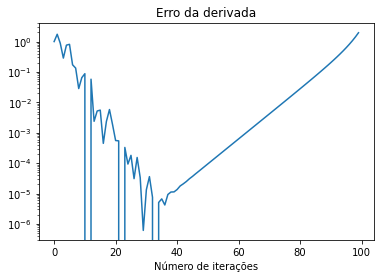

In [51]:
def exp(x):
    return np.exp(x)

hs = np.logspace(-27,0,base=2, num=100)
ddf = ddf_central(exp, 0 , hs)

erro = ddf - 1

plt.semilogy(abs(erro))
plt.title('Erro da derivada')
plt.xlabel('Número de iterações')

ax = plt.gca()

In [48]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?
- Use erros relativos; e
- faça várias curvas no mesmo gráfico.

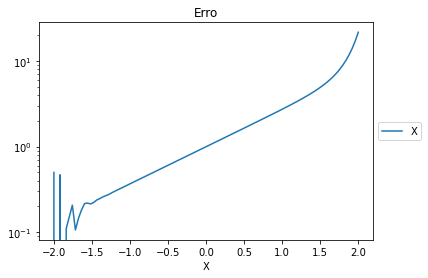

In [53]:
hs = np.logspace(-27,0,base=2, num=100)
xs = np.linspace(-2, 2, 100)
ddf = ddf_central(exp, xs , hs)

plt.semilogy(xs, ddf)

plt.xlabel("X")
plt.title("Erro")

plt.legend('X', bbox_to_anchor=(1,0.5), loc="center left")

ax = plt.gca()

In [8]:
assert len(ax.lines) >= 8
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

AssertionError: 

Comente.

É possível perceber que o gráfico bate com o pensamento matemático, um h menor não é necessariamente melhor. Ele aparece ao quadrado no denominador, aumentando em muito o valor da segunda derivada. Mas ele deveria tender a 0, mas no caso dos computadores 

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [9]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [10]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    h = 1e-3
    return (f(x+h) - f(x-h))/(2*h)

def g3(x):
    h = 1e-5
    return (f(x+h) - f(x-h))/(2*h)

In [11]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

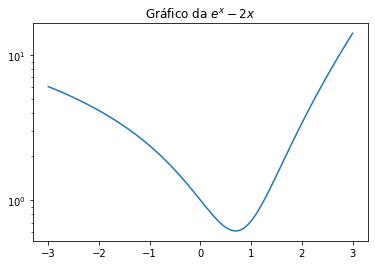

In [21]:
xs = np.linspace(-3, 3, 250)
plt.semilogy(xs, f(xs))
plt.title("Gráfico da $e^x-2x$")
ax = plt.gca()

In [13]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

Claramente, o intervalo [0, 1] possui um X onde f'(x) = 0. Isto porque é onde a função possui um ponto de mínimo, ao menos local.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

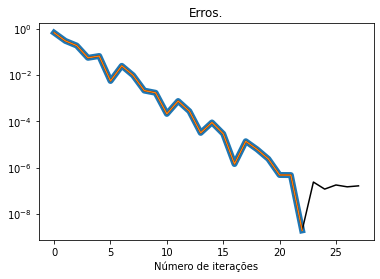

In [44]:
# YOUR CODE HERE
raiz = np.log(2)
raizg1 = bissecao_pts(g1, 0, 1)
raizg2 = bissecao_pts(g2, 0, 1)
raizg3 = bissecao_pts(g3, 0, 1)

plt.semilogy(abs(raiz - raizg1), linewidth=6, label='Erro do analitico')
plt.semilogy(abs(raiz - raizg2), color='black', label='Erro da derivada h=1e-3')
plt.semilogy(abs(raiz - raizg3), label='Erro da derivada h=1e-5')
plt.title('Erros.')
plt.xlabel('Número de iterações')
ax = plt.gca()

In [43]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

Pensar que a distância deveria sempre diminuir é um erro comum. E quando se trata da derivada ainda se tem o fator h, que até um certo ponto não interfere. Mas a partir de uma certa iteração ele piora e muito a aproximação da raiz da derivada de f. E com a tolerância correta da derivada é até possível se comparar com a versão analitica da derivada, usando bisseção claro.

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [ ]:
def h1(x):
    # YOUR CODE HERE
    raise NotImplementedError()

def h2(x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
np.random.seed(41)
for x in np.random.randn(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

YOUR ANSWER HERE

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Defina a derivada (analítica) de f:

In [ ]:
def g1(x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
np.random.seed(2022)
for x in np.random.randn(10):
    assert np.isclose(g1(x), df_central(f, x), rtol=1e-8)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

O que você acha que aconteceu?

YOUR ANSWER HERE

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

plt.grid()
ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [ ]:
for l in ax.lines:
    ys = l.get_ydata()
    assert min(abs(ys)) < 1e-8